In [3]:
%matplotlib inline
%matplotlib notebook
%matplotlib widget
import math
import random
import numpy as np
import import_ipynb
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def CreateDistanceMatrix(coords):
    
    return np.sqrt((np.square(coords[:, np.newaxis] - coords).sum(axis=2)))


def nearestNeighbourSolution(dist_matrix):
    
    node = random.randrange(len(dist_matrix))
    result = [node]

    nodes_to_visit = list(range(len(dist_matrix)))
    nodes_to_visit.remove(node)

    while nodes_to_visit:
        nearest_node = min([(dist_matrix[node][j], j) for j in nodes_to_visit], key=lambda x: x[0])
        node = nearest_node[1]
        nodes_to_visit.remove(node)
        result.append(node)

    return result   

vectorToDistMatrix function creates the Distance Matrix between the randomly selected points in the Grid.
Below we import the Points_generator Class to create a test object and compute the distance matrix. Next, we plot a 3D scatter plot for the distances.

The implementation of Simulated Annealing involves a greedy starting point. We start from a randomly selected starting point and pick the consequetive cities with the least neighbouring distance. 

<IPython.core.display.Javascript object>


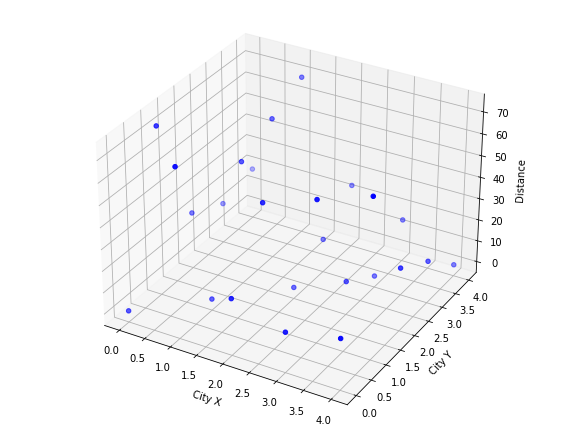

Traverse the cities in the following order (greedy Initial solution): 

City4 --> City3 --> City2 --> City0 --> City1


In [5]:
if __name__=="__main__":
    from Points_Generator import NodeGenerator
    w, h, num = 100, 60, 5 
    test_object = NodeGenerator(width=w, height= h , nodesNumber= num)
    dist_mat = CreateDistanceMatrix(test_object.generate())
    X = np.arange(0,num)
    Y = np.arange(0,num)
    Z = [(x, y, dist_mat[x,y]) for x in X for y in Y]
    fig = plt.figure(figsize=(8,6))
    ax = Axes3D(fig)
    x_coordinates = [item[0] for item in Z]
    y_coordinates = [item[1] for item in Z]
    z_coordinates = [item[2] for item in Z]
    ax.scatter(x_coordinates, y_coordinates, z_coordinates,c='b', marker = 'o')
    ax.set_xlabel('City X')
    ax.set_ylabel('City Y')
    ax.set_zlabel('Distance')
    ax.tick_params(length = 1)
    plt.show()
    Traverse_list_initial = nearestNeighbourSolution(dist_mat)
    print("Traverse the cities in the following order (greedy Initial solution): "+"\n")
    print(' --> '.join(['City'+str(i) for i in Traverse_list_initial]))